Projeto de ML

*******1. Import the Datset and explore the Data*******

**1.1 Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')

**1.2 Importing the datasets**

In [2]:
import zipfile, io

z = zipfile.ZipFile('project_data.zip')
z.extractall()

del z

In [3]:
train_data = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

**1.3 Information about datasets**

In [4]:
df = train_data.copy()

In [5]:
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [6]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [7]:
df.shape

(593471, 33)

In [8]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [9]:
# Count the number of duplicates
num_duplicates = train_data.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 0


**1.4 Descriptive Statistics**

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574026.0,NaN,NaN,NaN,42.11427,14.256432,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574026,3,N,571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,593471,1096,2020-03-06,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574026,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545375.0,NaN,NaN,NaN,491.088321,6092.91812,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,NaN,NaN,NaN,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187245,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574026,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1.5 Exploring data visually**

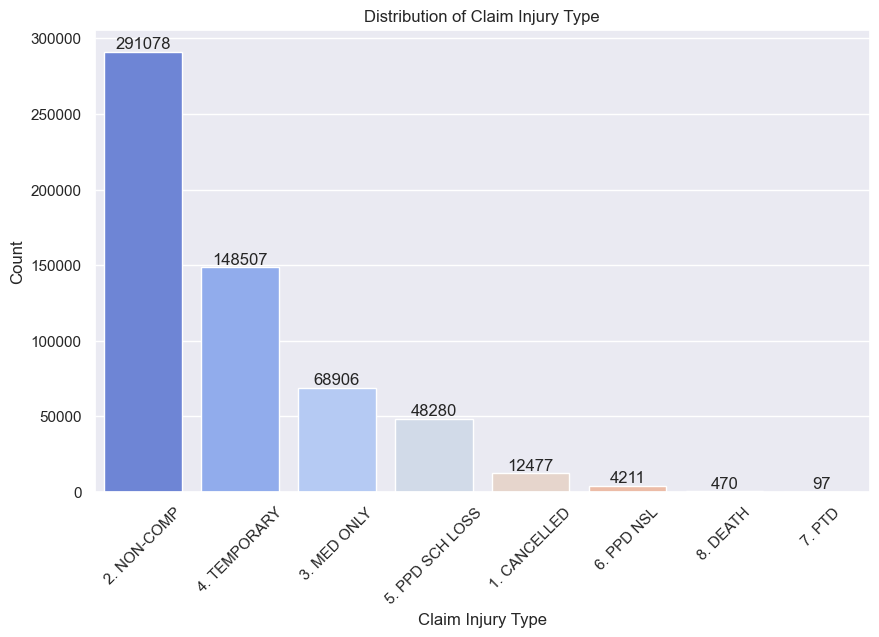

In [11]:
# Bar plot for 'Claim Injury Type' with value labels
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.countplot(data=train_data, x='Claim Injury Type', order=train_data['Claim Injury Type'].value_counts().index, palette='coolwarm')

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Set title and labels
plt.title('Distribution of Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


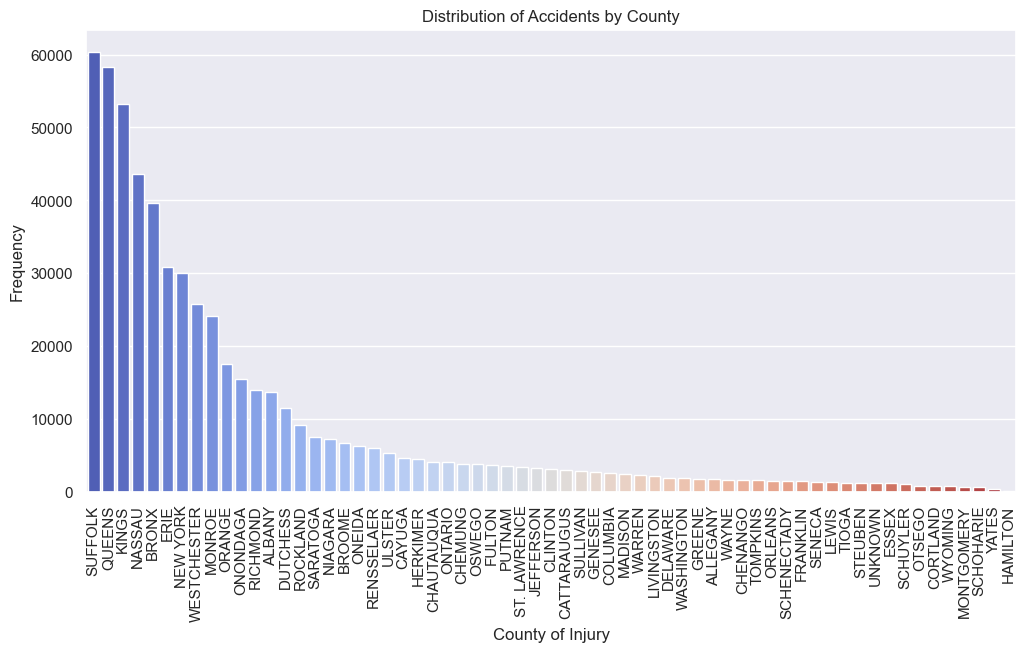

In [12]:
# Bar plot for 'County of Injury' with adjusted colors
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='County of Injury', order=train_data['County of Injury'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Distribution of Accidents by County')
plt.ylabel('Frequency')
plt.show()

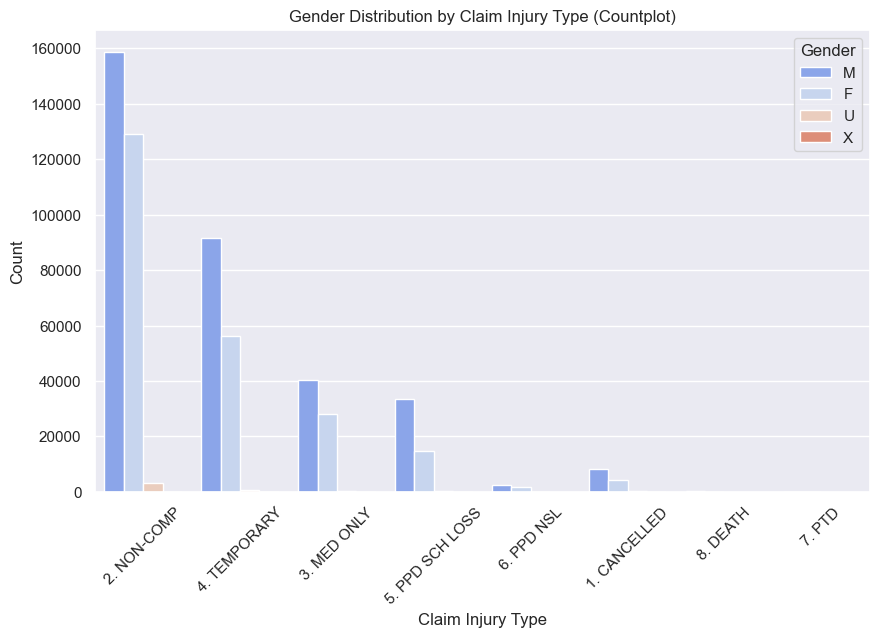

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Claim Injury Type', hue='Gender', data=train_data, palette='coolwarm')
plt.title('Gender Distribution by Claim Injury Type (Countplot)')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


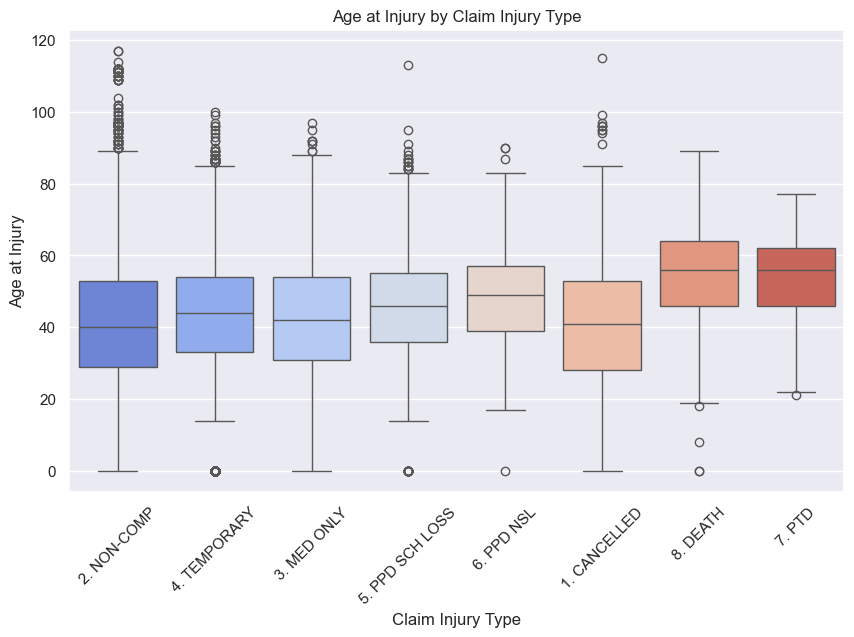

In [14]:
# Boxplot for 'Age at Injury' by 'Claim Injury Type'
plt.figure(figsize=(10, 6))

# Apply a color palette and rotate the labels
sns.boxplot(data=train_data, x='Claim Injury Type', y='Age at Injury', palette='coolwarm')

# Set title and labels in English
plt.title('Age at Injury by Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Age at Injury')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


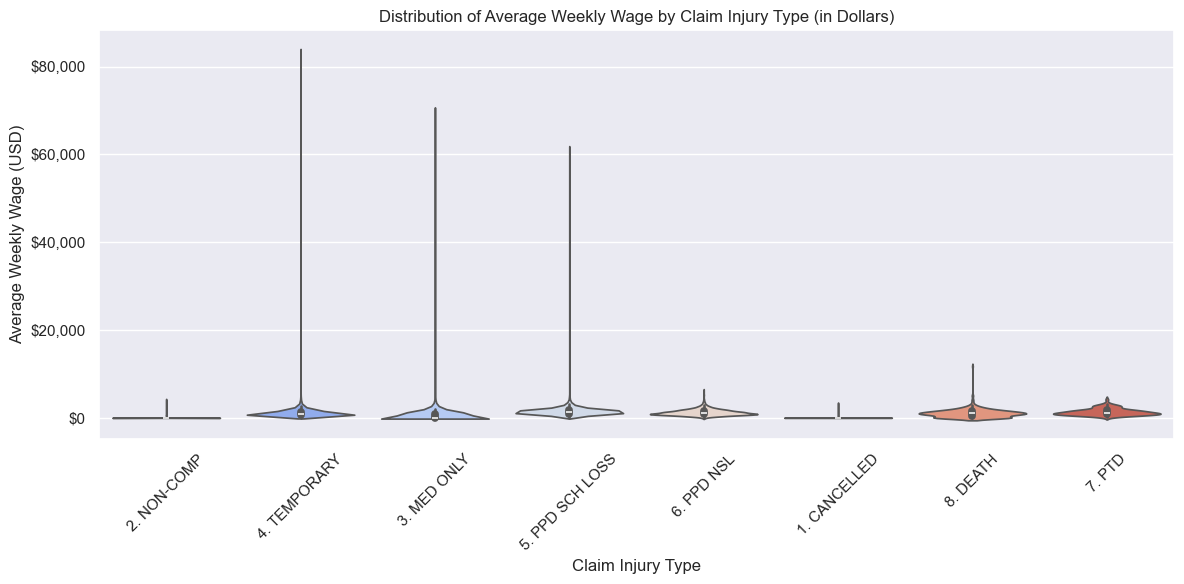

In [15]:
import matplotlib.ticker as mtick

# Definir um limite para remover outliers e facilitar a leitura
train_data_filtered = train_data[train_data['Average Weekly Wage'] < 100000]

# Violin plot after removing outliers
plt.figure(figsize=(12, 6))
sns.violinplot(data=train_data_filtered, x='Claim Injury Type', y='Average Weekly Wage', palette="coolwarm")

# Título e rótulos com mais detalhes
plt.title('Distribution of Average Weekly Wage by Claim Injury Type (in Dollars)')
plt.xlabel('Claim Injury Type')
plt.ylabel('Average Weekly Wage (USD)')

# Formatar o eixo y para mostrar os valores em dólares (com separadores de milhar)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


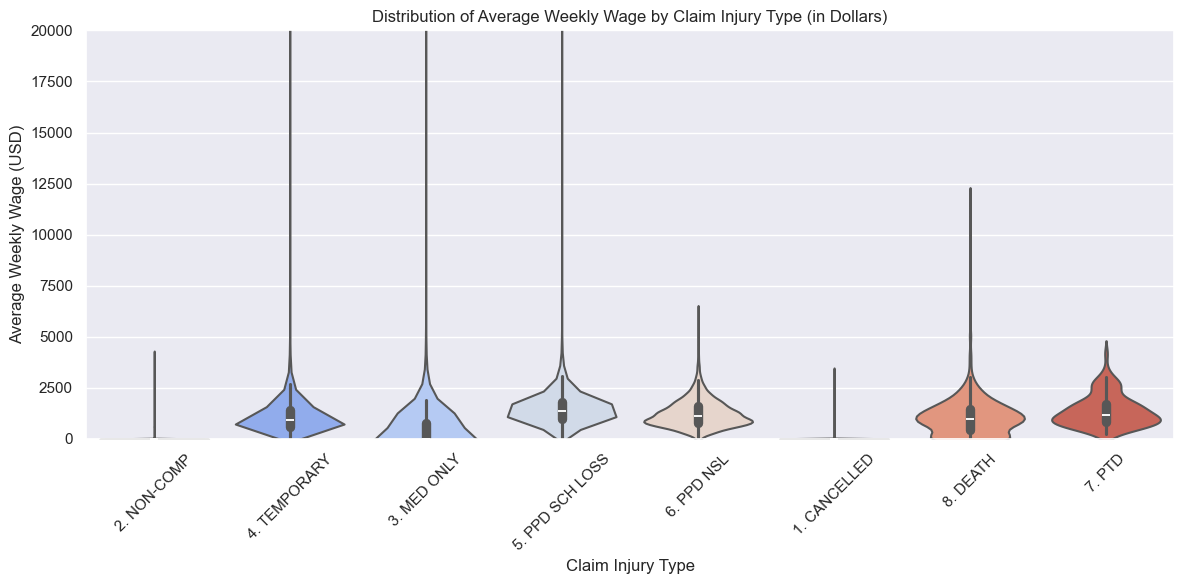

In [16]:
# Violin plot with improvements
plt.figure(figsize=(12, 6))

# Create the violin plot with thicker line edges
sns.violinplot(data=train_data_filtered, x='Claim Injury Type', y='Average Weekly Wage', palette="coolwarm", linewidth=1.5)

# Set the title and axis labels
plt.title('Distribution of Average Weekly Wage by Claim Injury Type (in Dollars)')
plt.xlabel('Claim Injury Type')
plt.ylabel('Average Weekly Wage (USD)')

# Limit the y-axis to focus on a more common range of values
plt.ylim(0, 20000)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**1.6 Analysing multivariate relationships**

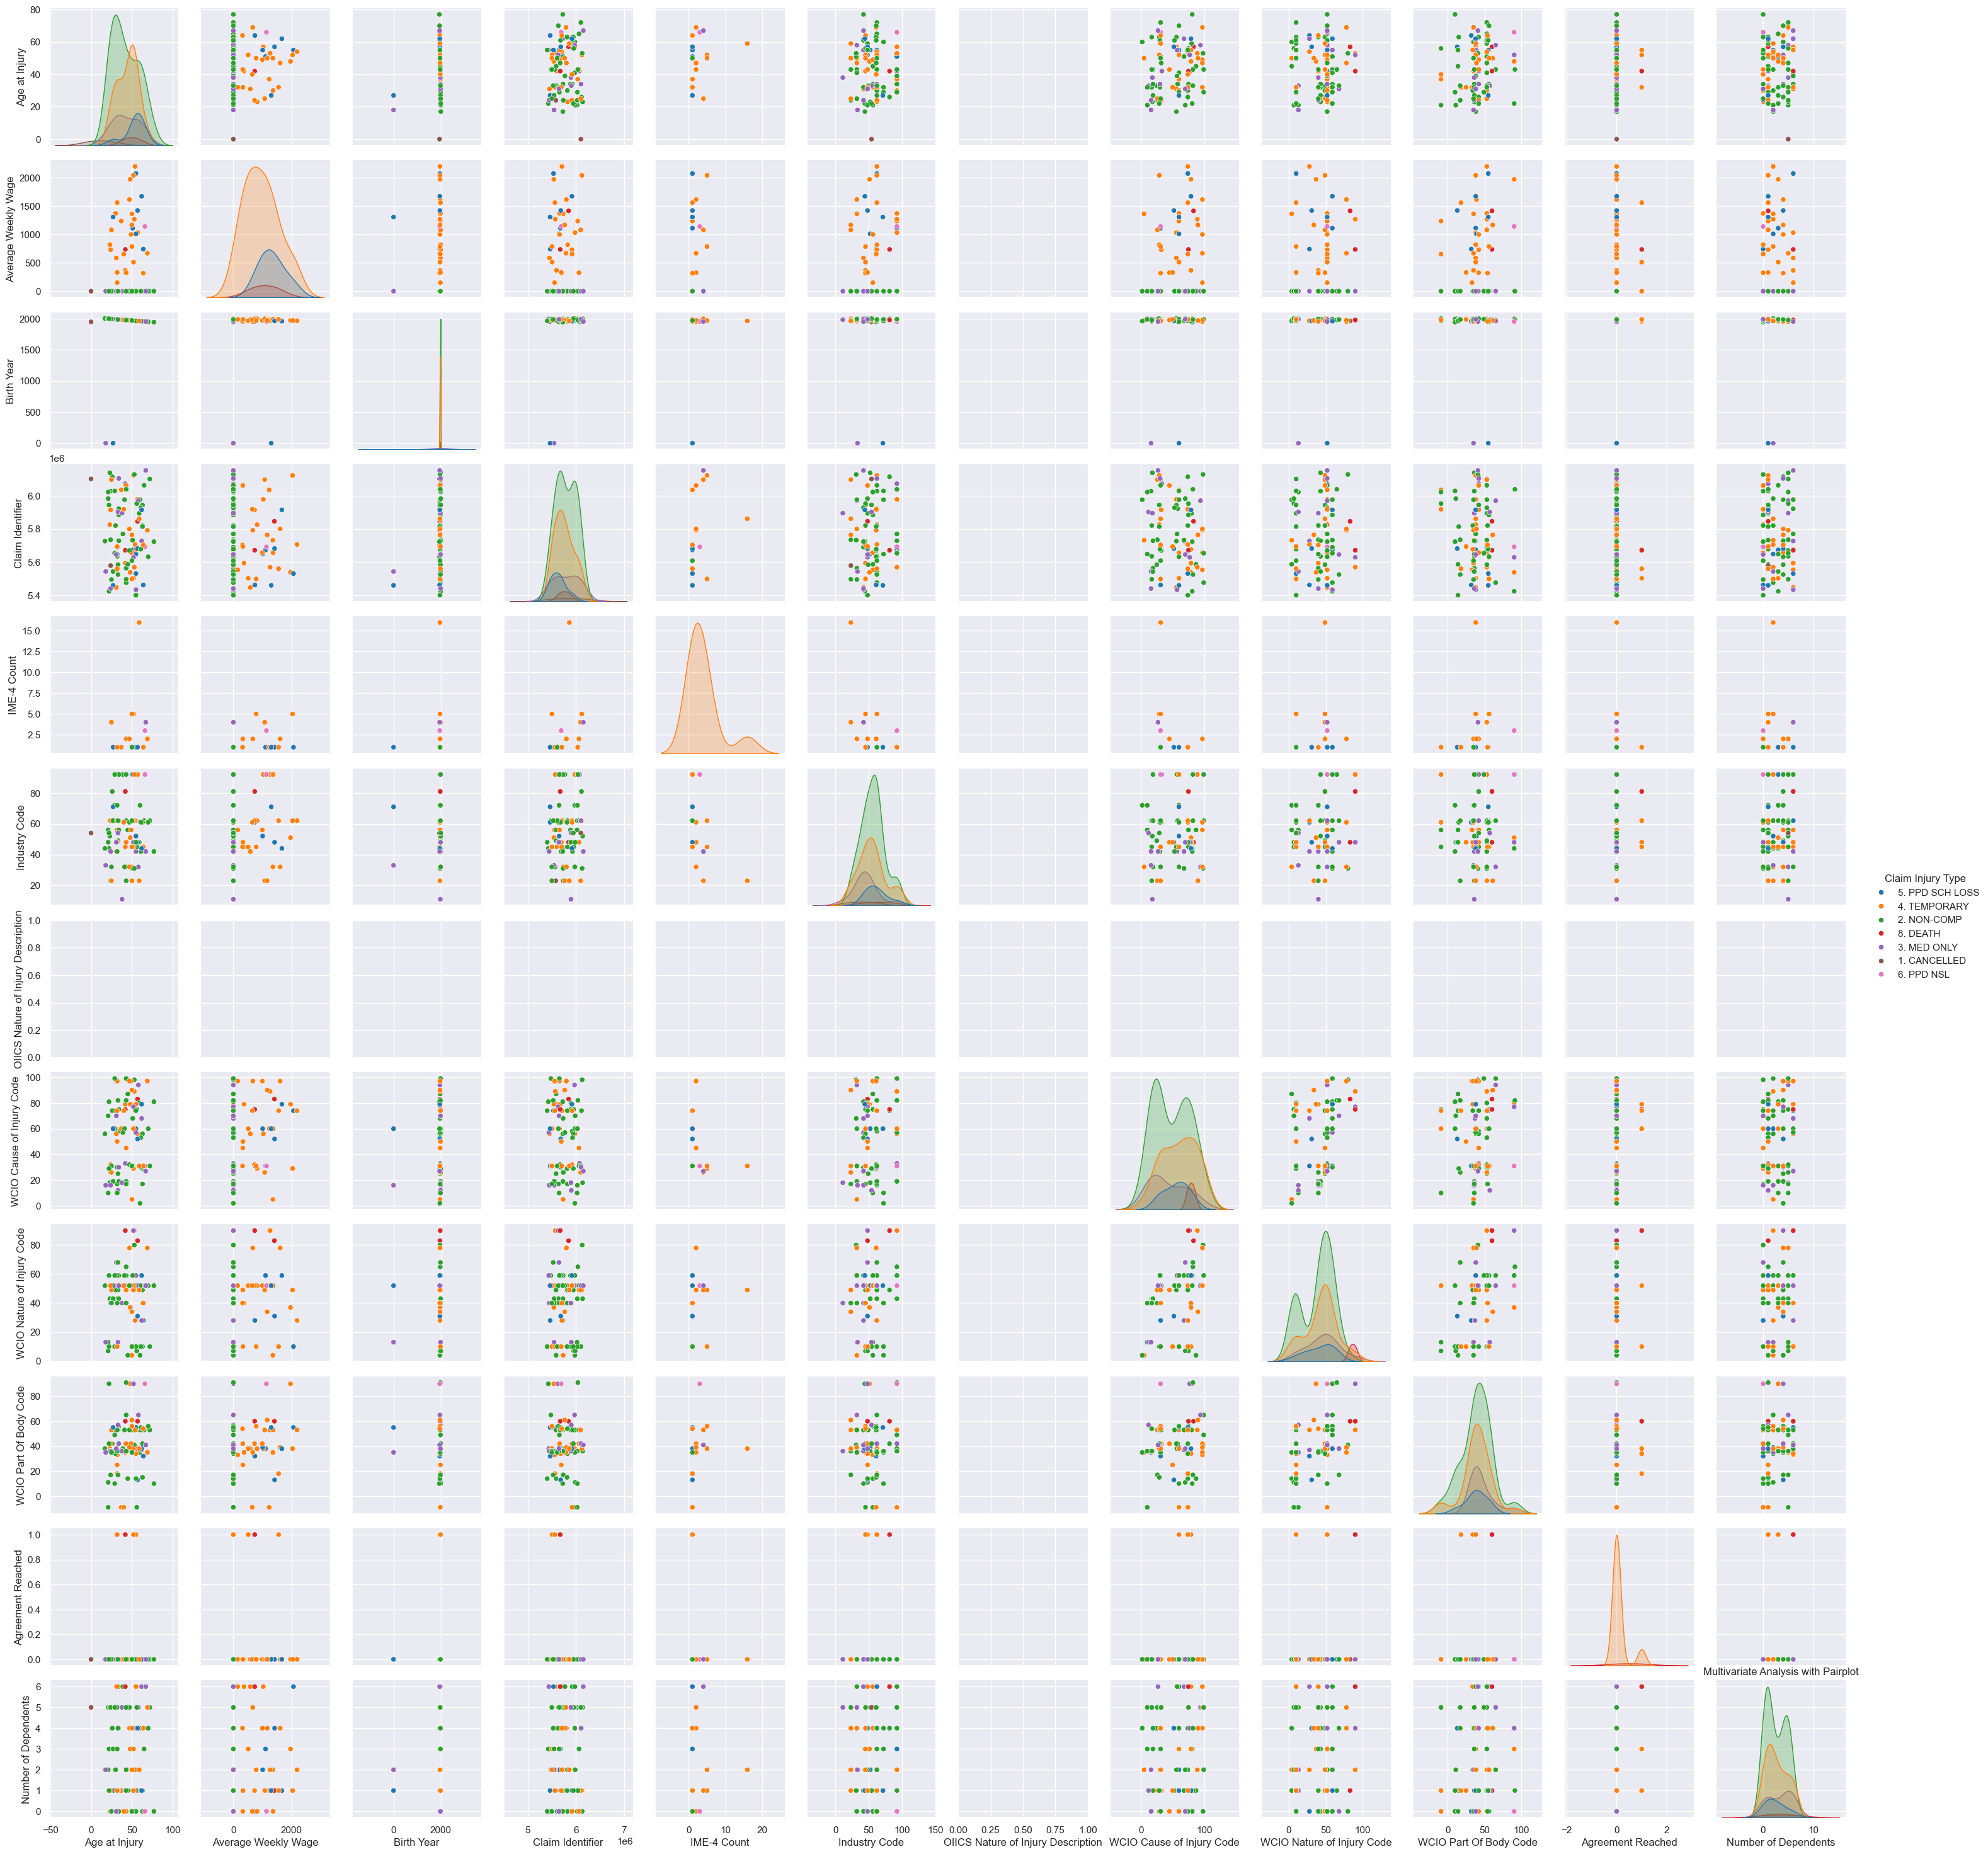

In [17]:
#sampling 1000 randoms rows from Dataframe
df_sample = df.sample(100, random_state=42)
sns.pairplot(df_sample, hue="Claim Injury Type", palette="tab10")
plt.title('Multivariate Analysis with Pairplot')
plt.show()


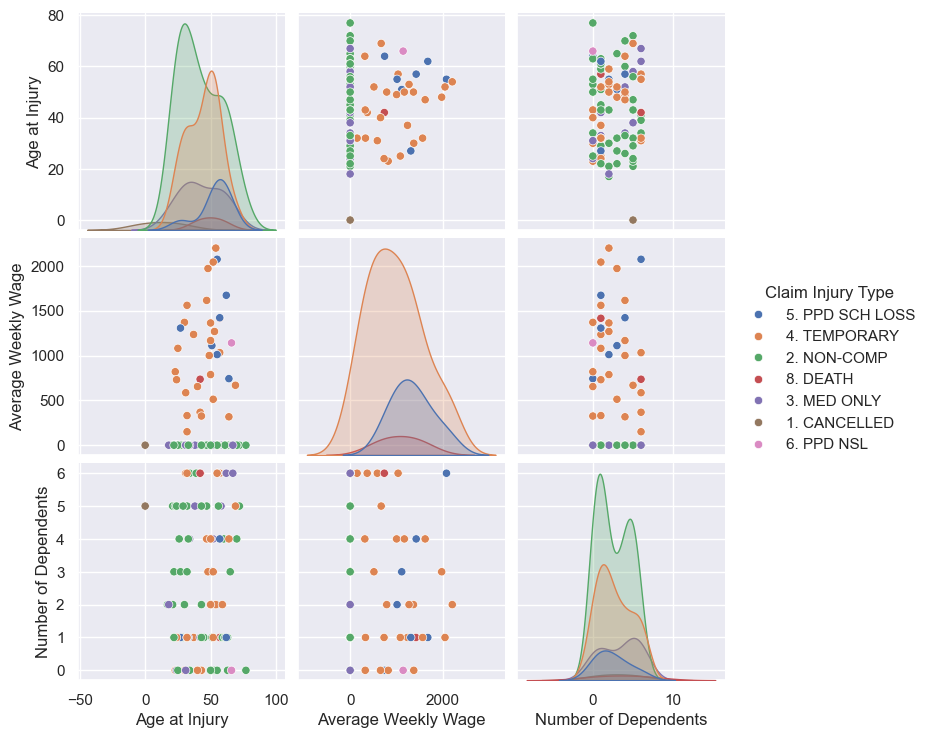

In [18]:
# Selecting only the most relevant variables
selected_columns = ['Age at Injury', 'Average Weekly Wage', 'Number of Dependents', 'Claim Injury Type']

# Creating the pairplot with the selected variables
sns.pairplot(df_sample[selected_columns], hue="Claim Injury Type")
plt.show()


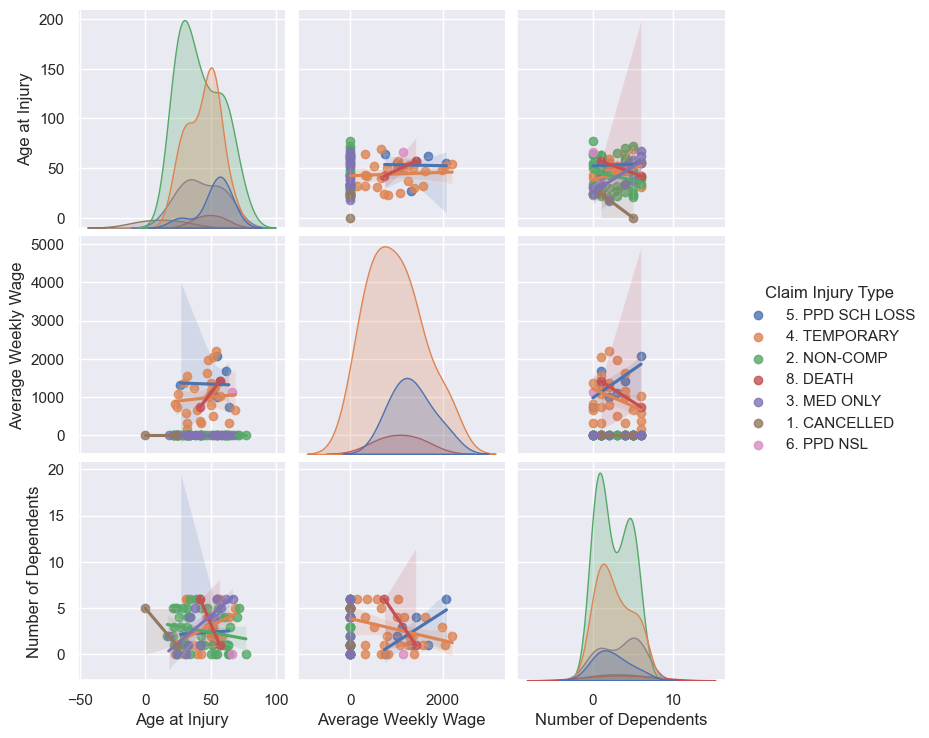

In [19]:
sns.pairplot(df_sample[selected_columns], hue="Claim Injury Type", kind='reg')
plt.show()


**1.7 Correlação entre variáveis numéricas**

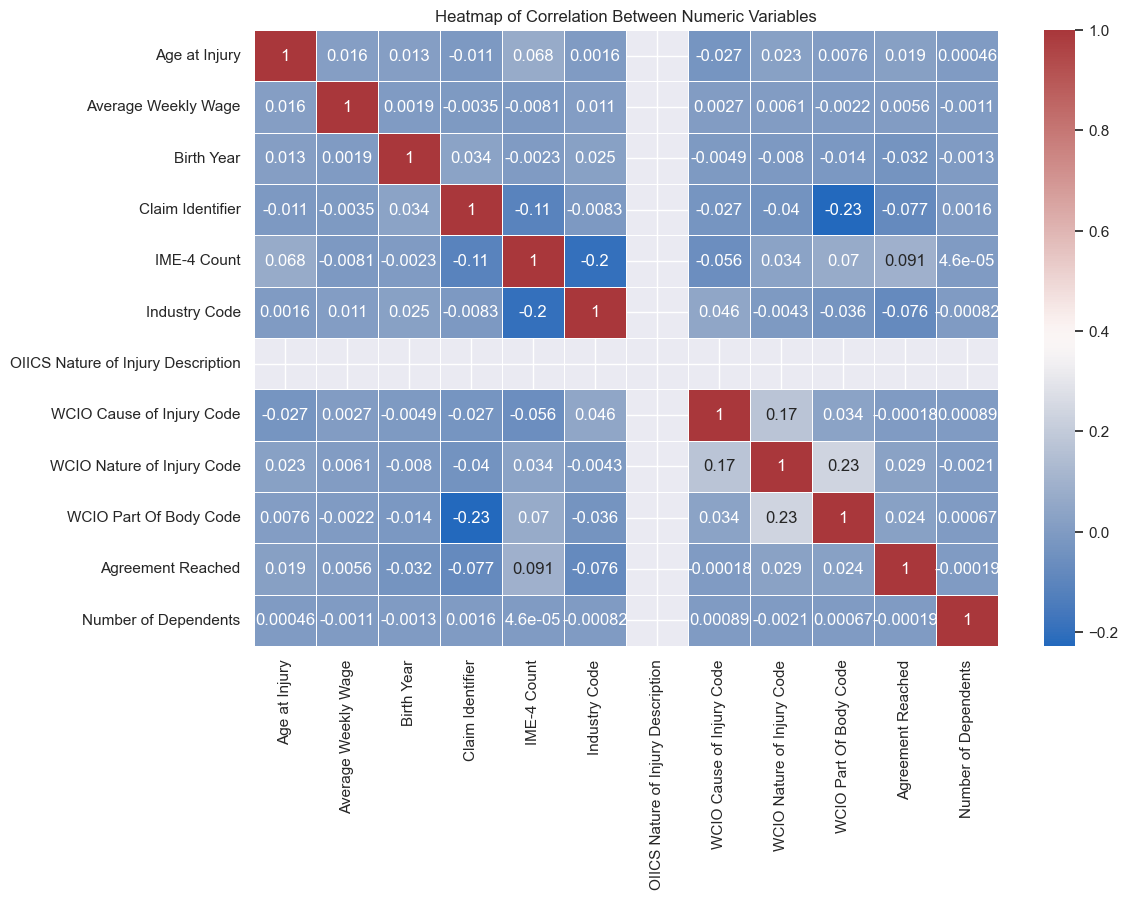

In [20]:


# Filter only the numeric variables
df_numeric = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag', linewidths=0.5)
plt.title('Heatmap of Correlation Between Numeric Variables')
plt.show()


**1.7 Correlação entre variáveis categóricas**

não consigo fazer isto, falta a correlção entre variaveis categóricas e numéricas

In [21]:
# Convertendo variáveis categóricas para numéricas via One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Claim Injury Type"])

In [22]:
df_encoded.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCB Decision,Number of Dependents,Claim Injury Type_1. CANCELLED,Claim Injury Type_2. NON-COMP,Claim Injury Type_3. MED ONLY,Claim Injury Type_4. TEMPORARY,Claim Injury Type_5. PPD SCH LOSS,Claim Injury Type_6. PPD NSL,Claim Injury Type_7. PTD,Claim Injury Type_8. DEATH
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,Not Work Related,1.0,False,True,False,False,False,False,False,False
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,Not Work Related,4.0,False,False,False,True,False,False,False,False
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,Not Work Related,6.0,False,False,False,True,False,False,False,False
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,Not Work Related,1.0,False,True,False,False,False,False,False,False


# 2. Clean and Pre-Process the dataset

## Numerical Data

In [23]:
df_numeric

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
0,31.0,0.00,1988.0,5393875,NaN,44.0,NaN,27.0,10.0,62.0,0.0,1.0
1,46.0,1745.93,1973.0,5393091,4.0,23.0,NaN,97.0,49.0,38.0,1.0,4.0
2,40.0,1434.80,1979.0,5393889,NaN,56.0,NaN,79.0,7.0,10.0,0.0,6.0
3,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61.0,NaN,1958.0,5393887,NaN,62.0,NaN,16.0,43.0,36.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,72.0,0.00,1950.0,6165075,NaN,48.0,NaN,25.0,90.0,-9.0,0.0,3.0
593468,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_numeric.isnull().sum()

Age at Injury                          19445
Average Weekly Wage                    48096
Birth Year                             48523
Claim Identifier                           0
IME-4 Count                           460668
Industry Code                          29403
OIICS Nature of Injury Description    593471
WCIO Cause of Injury Code              35085
WCIO Nature of Injury Code             35102
WCIO Part Of Body Code                 36527
Agreement Reached                      19445
Number of Dependents                   19445
dtype: int64

In [47]:
df_numeric['Age at Injury'].fillna(int(df_numeric['Age at Injury'].mean()), inplace=True)
df_numeric['Average Weekly Wage'].fillna(df_numeric['Average Weekly Wage'].mean().round(2))

0            0.00
1         1745.93
2         1434.80
3          491.09
4          491.09
           ...   
593466     491.09
593467       0.00
593468     491.09
593469     491.09
593470     491.09
Name: Average Weekly Wage, Length: 593471, dtype: float64

In [53]:
df_numeric['Birth Year'].dropna().mode()[0]

1978.0

In [52]:
# the mode in birth year is 0, which is not possible, so we will replace it with the median without the zeros and the nan values
df_numeric['Birth Year'].replace(0, np.nan, inplace=True)
df_numeric['Birth Year'].fillna(df_numeric['Birth Year'].dropna().mode()[0], inplace=True)

In [54]:
df_numeric['IME-4 Count']

0         NaN
1         4.0
2         NaN
3         NaN
4         NaN
         ... 
593466    NaN
593467    NaN
593468    NaN
593469    NaN
593470    NaN
Name: IME-4 Count, Length: 593471, dtype: float64